# Домашнее задание №3

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [30]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [7]:
from sklearn.linear_model import LinearRegression
Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Total_Bilirubin).reshape(-1,1), Direct_Bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.18116743679724934
slope: [0.39557996]


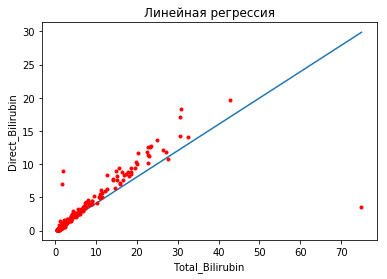

In [8]:
plt.xlabel('Total_Bilirubin')
plt.ylabel('Direct_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(Total_Bilirubin), max(Total_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Total_Bilirubin, Direct_Bilirubin, 'r.')
plt.show()

In [14]:
model.predict(np.array([1.0]).reshape(-1, 1))

array([0.5767474])

Если сравнить полученный результат с табличным, то можно заметить, что предсказанный результат не значительно отличается от табличных, следовательно, можно ориентироваться на полученные результаты по predict.

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

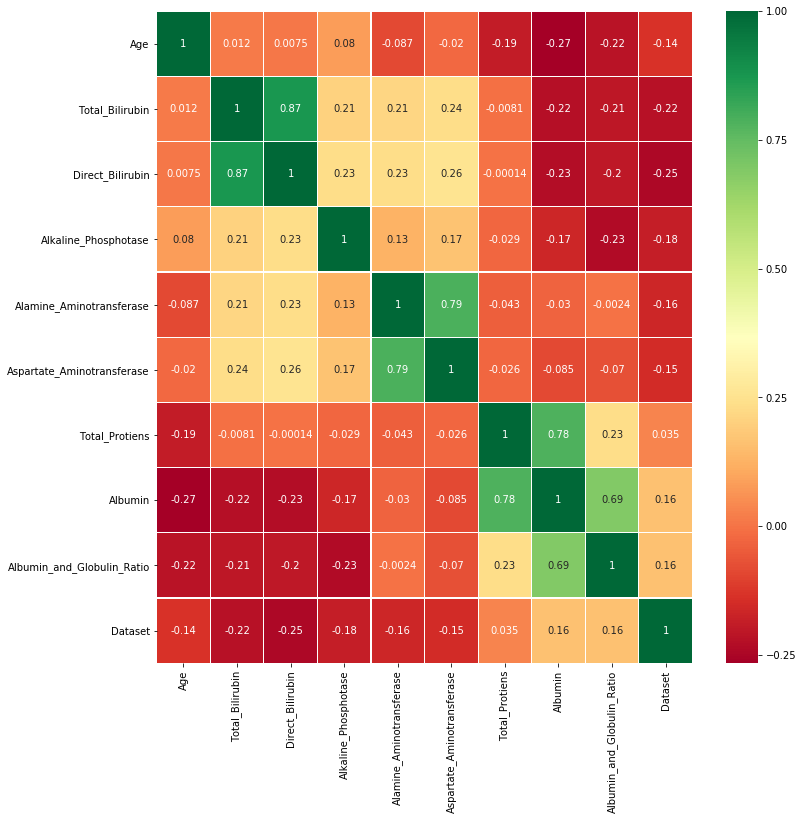

In [15]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [0]:
data= data.dropna(subset=['Albumin'])
data= data.dropna(subset=['Total_Protiens'])
data= data.dropna(subset=['Dataset'])

In [21]:
Albumin = data['Albumin']
Total_Protiens = data['Total_Protiens']
Dataset = data['Dataset']
x = np.vstack([np.array(Albumin), np.array(Total_Protiens)]).T
print('x - это двумерная матрица, где колонки - это Albumin и Total_Protiens : ')
print(x[:3])
y = np.array(Dataset)
model = LinearRegression().fit(x, y)

x - это двумерная матрица, где колонки - это Albumin и Total_Protiens : 
[[3.3 6.8]
 [3.2 7.5]
 [3.3 7. ]]


In [22]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 1.3078943399307645
slope: [ 0.19623349 -0.0985548 ]


Можно заметить, что переменная Dataset сильнее зависит от Albumin (0.196) и слабо зависит от Total_Protiens (-0,098)

In [23]:
print('Предсказание модели: ', model.predict(x[0:2]))

Предсказание модели:  [1.2852922  1.19668048]


Согласно предсказаниям первые 2 пациента больны, что соответствует табличным значениям

Посчитать квартили для всех колонок. 

In [25]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

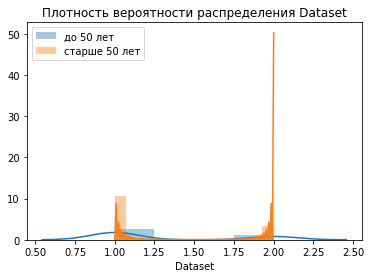

In [28]:
young_dataset = data[data['Age']<50]['Dataset']
old_dataset = data[data['Age']>50]['Dataset']
sns.distplot(young_dataset)
sns.distplot(old_dataset)
plt.title('Плотность вероятности распределения Dataset')
plt.legend(['до 50 лет', 'старше 50 лет'])
plt.show()

In [32]:
print(young_dataset.mean())
print(old_dataset.mean())

1.3142857142857143
1.2378640776699028


In [33]:
print('Квантили по пациентам до 50 лет')
young_dataset.quantile([.1, .25, .5, .75])

Квантили по пациентам до 50 лет


0.10    1.0
0.25    1.0
0.50    1.0
0.75    2.0
Name: Dataset, dtype: float64

In [34]:
print('Квантили по пациентам после 50 лет')
old_dataset.quantile([.1, .25, .5, .75])

Квантили по пациентам после 50 лет


0.10    1.0
0.25    1.0
0.50    1.0
0.75    1.0
Name: Dataset, dtype: float64

Можно заметить, что у пациентов старше 50 лет болезни печени встречаются чаще, чем у пациентов до 50 лет. А среднее значение выборок показало примерно одинаковые результаты. 


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [36]:
ill_dataset = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(ill_dataset, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

p-value равно 0.013, что меньше стандартной альфа ошибки 0.05, поэтому мы не можем принять принять нулевую гипотезу и можем сказать, что имеется статистическое различие между показателями Общий бирибулин у больных и генеральной совокупности

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [37]:
ill_dataset = data[data['Dataset']==1]['Total_Bilirubin']

healthy_dataset = data[data['Dataset']==2]['Total_Bilirubin']

stats.ttest_ind(ill_dataset, healthy_dataset)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

T-значение 5.44, p-value равно 7.8e-08, что намного меньше стандартной альфа ошибки 0.05, поэтому мы не принимаем нулевую гипотезу и можем сказать, что имеются статистические различия между здоровыми и больными людьми в целом. 

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [39]:
Age_0 = data[data['Age']<30]['Dataset']

Age_1 = data[data['Age']>30]['Dataset'] & data[data['Age']<55]['Dataset']

Age_2 = data[data['Age']>55]['Dataset']

stats.f_oneway(Age_0, Age_1, Age_2)

F_onewayResult(statistic=370.1953356534819, pvalue=4.0732978965818476e-116)

Так как результат p-value намного меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп с разным возрастом.

Вопросы задавать на почту yustiks@gmail.com